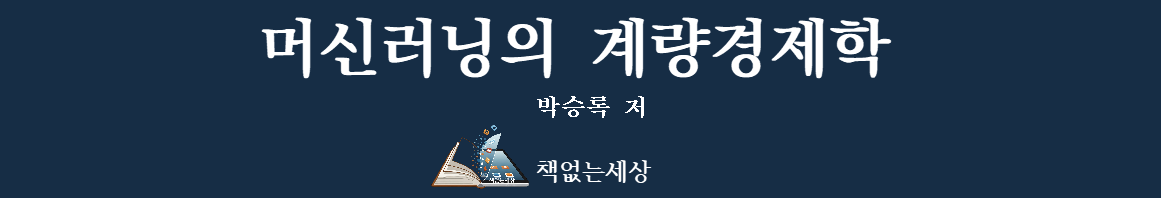

# Part 3: 전통적 계량경제학

## Chapter 4. 모형 설정과 함수 형태

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:\JupyterWorkingDirectory\MyStock")
os.getcwd()

'E:\\JupyterWorkingDirectory\\MyStock'

In [6]:
exec(open('E:/JupyterWorkingDirectory/MyStock/Functions/Traditional_Econometrics_Lib.py').read())

In [ ]:
"""
# #####################################################################
# 위의 함수는 아래 다양한 라이브러리와 함수를 한 문장으로 불러오는 방법
# #####################################################################

# 분석에 사용될 라이브러리(Libraries for the Analysis) 불러오기
# Libraries for the Analysis of Traditional Econometrics.py
# 불러오는 방법:  "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# #####################################################################

# 만약 특정 라이브러리가 설치되지 않았다는 에러 메시지가 나타날 때는 
# 해당 라이브러리를 설치하여야 함
# 아래 라이브러리를 하나 하나 실행하면서 어떤 라이브러리가 설치되지 않았는지 확인하여도 됨
# #####################################################################
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer.stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random

from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model

import wooldridge as woo
from imfpy.retrievals import dots
import wbdata
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
"""

## 2. 비선형 함수의 선형변환

In [4]:
# ####################################
# 비선형 모형(증가율, 탄력성 추정) ###
# ####################################
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import wooldridge as woo

wage1 = woo.dataWoo('wage1')

# 선형 회귀모형
reg = smf.ols(formula='wage ~ educ', data=wage1)
results =reg.fit()

print(results.summary().tables[1])
display(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.9049,0.685,-1.321,0.187,-2.250,0.441
educ,0.5414,0.053,10.167,0.000,0.437,0.646


In [17]:
wage1['wage_fitted'] = results.fittedvalues
wage1['residuals'] = results.resid

print(wage1.describe().T)

             count          mean         std       min        25%         50%  \
wage         526.0  5.896103e+00    3.693086  0.530000   3.330000    4.650000   
educ         526.0  1.256274e+01    2.769022  0.000000  12.000000   12.000000   
exper        526.0  1.701711e+01   13.572160  1.000000   5.000000   13.500000   
tenure       526.0  5.104563e+00    7.224462  0.000000   0.000000    2.000000   
nonwhite     526.0  1.026616e-01    0.303805  0.000000   0.000000    0.000000   
female       526.0  4.790875e-01    0.500038  0.000000   0.000000    0.000000   
married      526.0  6.083650e-01    0.488580  0.000000   0.000000    1.000000   
numdep       526.0  1.043726e+00    1.261891  0.000000   0.000000    1.000000   
smsa         526.0  7.224335e-01    0.448225  0.000000   0.000000    1.000000   
northcen     526.0  2.509506e-01    0.433973  0.000000   0.000000    0.000000   
south        526.0  3.555133e-01    0.479124  0.000000   0.000000    0.000000   
west         526.0  1.692015

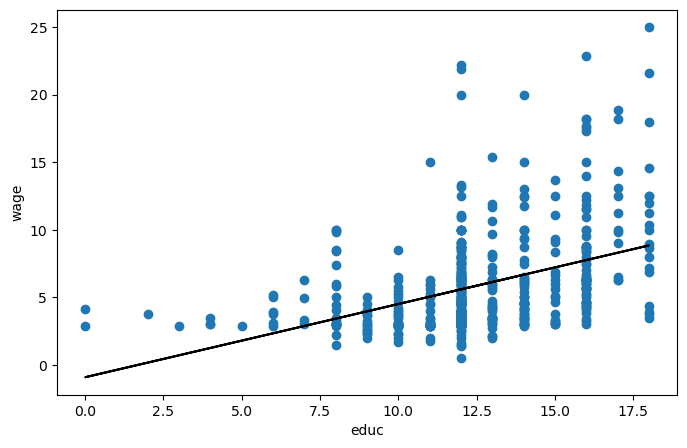

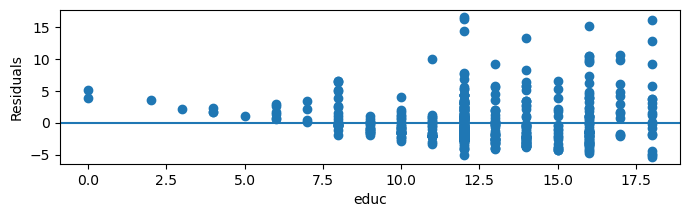

In [18]:
# 실제 데이터 값과 회귀추정식에 의한 Fitted된 값 그래프로 그리기
plt.figure(figsize =(8, 5))
plt.scatter('educ', 'wage', data=wage1)
plt.plot('educ', 'wage_fitted', data=wage1, color='black', linestyle='-')
plt.ylabel('wage')
plt.xlabel('educ')

# 잔차의 도표 그리기 
plt.figure(figsize =(8, 2))
plt.scatter('educ', 'residuals', data=wage1)
plt.ylabel('Residuals')
plt.xlabel('educ')
plt.axhline(y=0, linestyle='-')

In [5]:
# 증가율 추정 회귀모형
wage1 = woo.dataWoo('wage1')
wage1['Lwage'] = np.log(wage1['wage'])

reg = smf.ols(formula='Lwage ~ educ', data=wage1)
results =reg.fit()

print(results.summary().tables[1])
display(results.summary())

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Lwage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           3.27e-25
Time:                        08:47:29   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098
==============================================================================
Omnibus:                       11.804   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.811
Skew:                           0.268   Prob(JB):                      0.00100
Kurtosis:                       3.586   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
wage1['Lwage_fitted'] = results.fittedvalues
wage1['residuals'] = results.resid

print(wage1.describe().T)

              count          mean         std       min        25%  \
wage          526.0  5.896103e+00    3.693086  0.530000   3.330000   
educ          526.0  1.256274e+01    2.769022  0.000000  12.000000   
exper         526.0  1.701711e+01   13.572160  1.000000   5.000000   
tenure        526.0  5.104563e+00    7.224462  0.000000   0.000000   
nonwhite      526.0  1.026616e-01    0.303805  0.000000   0.000000   
female        526.0  4.790875e-01    0.500038  0.000000   0.000000   
married       526.0  6.083650e-01    0.488580  0.000000   0.000000   
numdep        526.0  1.043726e+00    1.261891  0.000000   0.000000   
smsa          526.0  7.224335e-01    0.448225  0.000000   0.000000   
northcen      526.0  2.509506e-01    0.433973  0.000000   0.000000   
south         526.0  3.555133e-01    0.479124  0.000000   0.000000   
west          526.0  1.692015e-01    0.375287  0.000000   0.000000   
construc      526.0  4.562738e-02    0.208874  0.000000   0.000000   
ndurman       526.0 

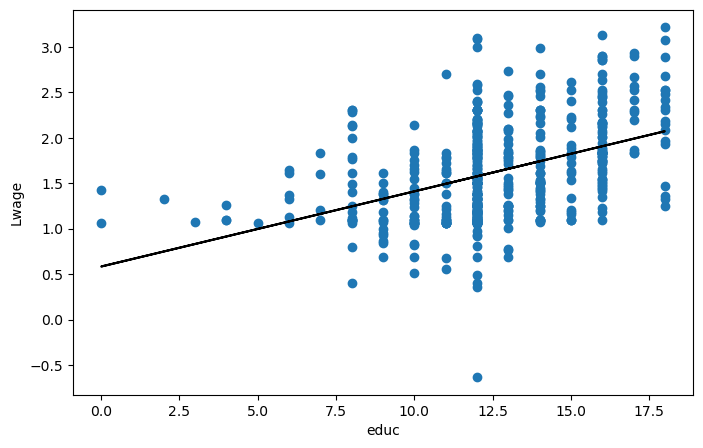

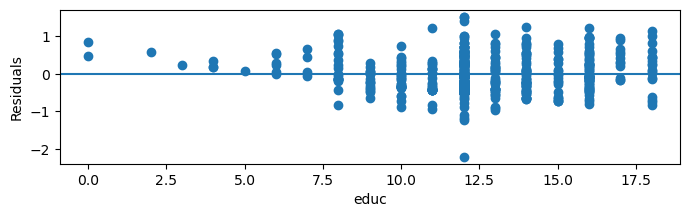

In [22]:
# 실제 데이터 값과 회귀추정식에 의한 Fitted된 값 그래프로 그리기
plt.figure(figsize =(8, 5))
plt.scatter('educ', 'Lwage', data=wage1)
plt.plot('educ', 'Lwage_fitted', data=wage1, color='black', linestyle='-')
plt.ylabel('Lwage')
plt.xlabel('educ')

# 잔차의 도표 그리기 
plt.figure(figsize =(8, 2))
plt.scatter('educ', 'residuals', data=wage1)
plt.ylabel('Residuals')
plt.xlabel('educ')
plt.axhline(y=0, linestyle='-')

In [6]:
# 탄력성 추정 회귀모형
wage1 = woo.dataWoo('wage1')

wage1['Lwage'] = np.log(wage1['wage'])
wage1['Leduc'] = np.log(wage1['educ'])

wage1.replace(-np.inf, np.nan, inplace=True)
wage1.dropna(inplace=True)

reg = smf.ols(formula='Lwage ~ Leduc', data=wage1)
results =reg.fit()

print(results.summary().tables[1])
display(results.summary())

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4447      0.218     -2.041      0.042      -0.873      -0.017
Leduc          0.8252      0.086      9.546      0.000       0.655       0.995


C:\Users\PARKSeungRok\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Lwage   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     91.12
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           5.19e-20
Time:                        08:48:17   Log-Likelihood:                -370.08
No. Observations:                 524   AIC:                             744.2
Df Residuals:                     522   BIC:                             752.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4447      0.218     -2.041      0.042      -0.873      -0.017
Leduc          0.8252      0.086      9.546      0.000       0.655       0.995
==============================================================================
Omnibus:                       11.725   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.046
Skew:                           0.287   Prob(JB):                      0.00147
Kurtosis:                       3.517   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
wage1['Lwage_fitted'] = results.fittedvalues
wage1['residuals'] = results.resid

print(wage1.describe().T)

              count          mean         std       min        25%  \
wage          524.0  5.905134e+00    3.697024  0.530000   3.330000   
educ          524.0  1.261069e+01    2.662889  2.000000  12.000000   
exper         524.0  1.695992e+01   13.552261  1.000000   5.000000   
tenure        524.0  5.104962e+00    7.231653  0.000000   0.000000   
nonwhite      524.0  1.030534e-01    0.304319  0.000000   0.000000   
female        524.0  4.770992e-01    0.499953  0.000000   0.000000   
married       524.0  6.087786e-01    0.488490  0.000000   0.000000   
numdep        524.0  1.043893e+00    1.262786  0.000000   0.000000   
smsa          524.0  7.251908e-01    0.446845  0.000000   0.000000   
northcen      524.0  2.519084e-01    0.434524  0.000000   0.000000   
south         524.0  3.549618e-01    0.478959  0.000000   0.000000   
west          524.0  1.679389e-01    0.374169  0.000000   0.000000   
construc      524.0  4.580153e-02    0.209254  0.000000   0.000000   
ndurman       524.0 

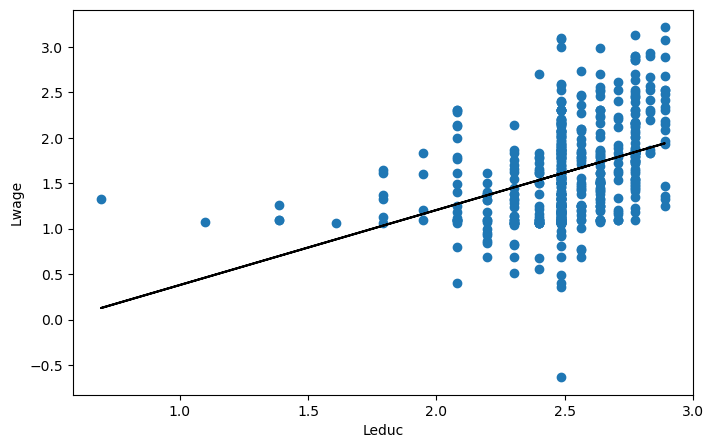

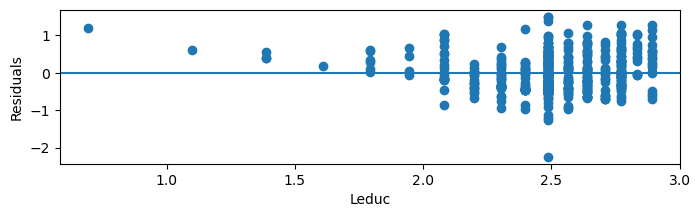

In [25]:
# 실제 데이터 값과 회귀추정식에 의한 Fitted된 값 그래프로 그리기
plt.figure(figsize =(8, 5))
plt.scatter('Leduc', 'Lwage', data=wage1)
plt.plot('Leduc', 'Lwage_fitted', data=wage1, color='black', linestyle='-')
plt.ylabel('Lwage')
plt.xlabel('Leduc')

# 잔차의 도표 그리기 
plt.figure(figsize =(8, 2))
plt.scatter('Leduc', 'residuals', data=wage1)
plt.ylabel('Residuals')
plt.xlabel('Leduc')
plt.axhline(y=0, linestyle='-')

## 4. 파라미터에 대한 비선형 함수

In [7]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.optimize import minimize

# 데이터 불러오기
data = pd.read_csv('data/KorAutoCD.csv')
data.set_index('year', inplace=True)
display(data) 

# 로그변환
data['lnY'] = np.log(data['y'])
data['lnL'] = np.log(data['l'])
data['lnK'] = np.log(data['k'])

# Translog function 추정을 위한 변수 생성
data['lnK_squared'] = 0.5*data['lnK'] ** 2
data['lnL_squared'] = 0.5*data['lnL'] ** 2
data['lnK_lnL'] = data['lnK'] * data['lnL']
display(data)

# Cobb-Douglas 생산함수 추정
reg_CD = smf.ols(formula='lnY ~ lnL + lnK', data=data)
results_CD = reg_CD.fit()
display(results_CD.summary())

# Translog 생산함수 추정
reg_TL = smf.ols(formula='lnY ~ lnL + lnK + lnK_squared+ lnL_squared +lnK_lnL', data=data)
results_TL = reg_TL.fit()
display(results_TL.summary())

# CES 생산함수 추정
def ces_production(params, y, l, k):
    A, delta, rho = params
    return A * (delta * l*rho + (1 - delta) * k**rho)**(1/rho)

# 최소화를 위한 목적함수
def objective(params, y, l, k):
    estimated_y = ces_production(params, y, l, k)
    return np.sum((y - estimated_y)**2)

# 초깃값
initial_params = [1, 0.5, 0.5]

# 추정
result = minimize(objective, initial_params, args=(data['y'], data['l'], data['k']), method='Nelder-Mead')

# 추정된 파라미터
estimated_params = result.x
display(estimated_params)

# 파라미터 정리
A_hat, delta_hat, rho_hat = estimated_params
sigma_hat = 1 / (1 - rho_hat)


print(f"Estimated A: {A_hat}")
print(f"Estimated delta: {delta_hat}")
print(f"Estimated rho: {rho_hat}")
print(f"Estimated sigma (elasticity of substitution): {sigma_hat}")

,y,l,k
year,,,
1995,10260916,920,18168094
1996,12239492,1008,21567902
1997,12273012,1103,24489044
1998,8341342,847,25703862
1999,12487276,812,26211220
2000,14785184,987,27298364
2001,15132040,886,28679924
2002,15553156,827,29635816
2003,16337632,874,31398302


,y,l,k,lnY,lnL,lnK,lnK_squared,lnL_squared,lnK_lnL
year,,,,,,,,,
1995,10260916,920,18168094,16.143853,6.824374,16.715178,139.698580,23.286038,114.070617
1996,12239492,1008,21567902,16.320178,6.915723,16.886717,142.580601,23.913615,116.783863
1997,12273012,1103,24489044,16.322913,7.005789,17.013736,144.733613,24.540540,119.194648
1998,8341342,847,25703862,15.936735,6.741701,17.062152,145.558512,22.725264,115.027921
1999,12487276,812,26211220,16.340221,6.699500,17.081698,145.892205,22.441652,114.438842
2000,14785184,987,27298364,16.509136,6.894670,17.122337,146.587218,23.768237,118.052866
2001,15132040,886,28679924,16.532325,6.786717,17.171708,147.433777,23.029763,116.539521
2002,15553156,827,29635816,16.559774,6.717805,17.204494,147.997310,22.564450,115.576432
2003,16337632,874,31398302,16.608982,6.773080,17.262264,148.992886,22.937309,116.918704


C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnY   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.62e-10
Time:                        18:54:15   Log-Likelihood:                 15.157
No. Observations:                  19   AIC:                            -24.31
Df Residuals:                      16   BIC:                            -21.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8129      1.731     -3.358      0.004      -9.483      -2.143
lnL            0.6630      0.304      2.184      0.044       0.020       1.306
lnK            1.0347      0.090     11.475      0.000       0.844       1.226
==============================================================================
Omnibus:                       22.158   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.504
Skew:                          -1.986   Prob(JB):                     3.92e-07
Kurtosis:                       7.636   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnY   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     45.37
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           8.90e-08
Time:                        18:54:15   Log-Likelihood:                 16.081
No. Observations:                  19   AIC:                            -20.16
Df Residuals:                      13   BIC:                            -14.50
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      68.8806    120.444      0.572      0.577    -191.322     329.084
lnL             3.6067     30.117      0.120      0.907     -61.457      68.670
lnK            -8.6849     10.050     -0.864      0.403     -30.397      13.027
lnK_squared     0.6394      0.670      0.955      0.357      -0.808       2.086
lnL_squared     0.0452      7.193      0.006      0.995     -15.494      15.584
lnK_lnL        -0.1982      1.731     -0.114      0.911      -3.939       3.542
==============================================================================
Omnibus:                       27.864   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.485
Skew:                          -2.349   Prob(JB):                     2.96e-11
Kurtosis:                       9.258   Cond. No.                     8.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([0.78302296, 0.41794943, 1.56721001])

Estimated A: 0.783022961937742
Estimated delta: 0.41794942639143384
Estimated rho: 1.5672100076236366
Estimated sigma (elasticity of substitution): -1.7630154379496323


## 5. 모형 설정 오류(model specification error)

가. 독립변수 누락(omitted variable)의 문제

In [8]:
# ########################################
# 누락 변수(Omitted Variable)의 문제    ###
# ########################################

import wooldridge as woo
import statsmodels.formula.api as smf

gpa1 = woo.dataWoo('gpa1')

# 전체 모형
reg = smf.ols(formula='colGPA ~ ACT + hsGPA', data=gpa1)
results = reg.fit()
b = results.params
print(results.summary().tables[1])

# relation between regressors:
reg2 = smf.ols(formula='hsGPA ~ ACT', data=gpa1)
results2 = reg2.fit()
delta = results2.params
print(results2.summary().tables[1])

# omitted variables formula for b1_tilde:
b1_tilde = b['ACT'] + b['hsGPA'] * delta['ACT']
print(f'b1_tilde:  \n{b1_tilde}\n')

# hsGPA 누락모형
reg3 = smf.ols(formula='colGPA ~ ACT', data=gpa1)
results3 = reg3.fit()
b_om = results3.params
print(results3.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2863      0.341      3.774      0.000       0.612       1.960
ACT            0.0094      0.011      0.875      0.383      -0.012       0.031
hsGPA          0.4535      0.096      4.733      0.000       0.264       0.643
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4625      0.218     11.310      0.000       2.032       2.893
ACT            0.0389      0.009      4.345      0.000       0.021       0.057
b1_tilde:  
0.027063973943178506

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4030      0.264      9.095      0.000       1.881       2.925
ACT            0.0

### 나. 관련 없는 변수(irrelevant variable)의 포함 문제
### 다. 통제변수(control variable) 제외의 문제

In [9]:
# ################################################
# 관련 없는 변수 포함 문제, 통제변수 제외의 문제 ##
# ################################################
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# 데이터 읽어오기
edu_inc = pd.read_csv('Data/edu_inc.csv')
display(edu_inc)

# 상관계수 행렬
corEdu = edu_inc.corr()
display(corEdu)

# 1) 누락된 변수 모형의 문제                      
# 참모형(true model)
mod1 = smf.ols('np.log(faminc) ~ hedu + wedu', data = edu_inc).fit()
print(mod1.summary().tables[1]) 
# 누락된 변수가 있는 모형
mod2 = smf.ols('np.log(faminc) ~ hedu', data = edu_inc).fit() 
print(mod2.summary().tables[1]) 

# 2) 관련없는 변수 포함모형의 문제
# 참모형
mod3 = smf.ols('np.log(faminc) ~ hedu + wedu + kl6', data = edu_inc).fit()
print(mod3.summary().tables[1])

# 관련없는 변수 포함모형
mod4 = smf.ols('np.log(faminc) ~ hedu + wedu + kl6 + xtra_x5 + xtra_x6', data=edu_inc).fit() 
print(mod4.summary().tables[1])

,faminc,hedu,wedu,kl6,xtra_x5,xtra_x6
0,61651.80,12,12,1,11.013550,23.44493
1,82404.00,9,12,0,9.372190,22.59274
2,79531.20,12,12,1,12.426200,23.16608
3,27594.00,10,12,0,10.256640,23.01776
4,103194.00,12,14,1,11.798300,25.61441
...,...,...,...,...,...,...
423,74738.16,12,10,0,6.959492,15.64557
424,134723.00,8,12,0,7.991520,19.74136
425,129351.60,11,13,0,10.200390,23.27909
426,113400.00,12,12,0,12.113630,24.55408


,faminc,hedu,wedu,kl6,xtra_x5,xtra_x6
faminc,1.000000,0.354684,0.362328,-0.071956,0.289817,0.351366
hedu,0.354684,1.000000,0.594343,0.104877,0.836168,0.820563
wedu,0.362328,0.594343,1.000000,0.129340,0.517798,0.799306
kl6,-0.071956,0.104877,0.129340,1.000000,0.148742,0.159522
xtra_x5,0.289817,0.836168,0.517798,0.148742,1.000000,0.900206
xtra_x6,0.351366,0.820563,0.799306,0.159522,0.900206,1.000000


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2647      0.122     84.141      0.000      10.025      10.505
hedu           0.0439      0.009      5.028      0.000       0.027       0.061
wedu           0.0390      0.012      3.369      0.001       0.016       0.062
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5385      0.092    114.436      0.000      10.358      10.720
hedu           0.0613      0.007      8.638      0.000       0.047       0.075
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2378      0.121     84.619      0.000      10.000      10.476
hedu           0.0448      0.009      5.191      0.0

### 라. 모형 설정 오류의 검정

#### 1) 램지(Ramsey)의 RESET 검정

In [10]:
# ##############################
# 모형설정오류 테스트(RESET) ###
# ##############################
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence as smo

hprice1 = woo.dataWoo('hprice1')
display(hprice1)
hprice1.describe()

# 최소자승법 적용
reg = smf.ols(formula='price ~ lotsize + sqrft + bdrms', data=hprice1)
results = reg.fit()
display(results.summary())

# RESET test를 위한 회귀분석
hprice1['fitted_sq'] = results.fittedvalues ** 2
hprice1['fitted_cub'] = results.fittedvalues ** 3
reg_reset = smf.ols(formula='price ~ lotsize + sqrft + bdrms +'
                            'fitted_sq + fitted_cub', data=hprice1)
results_reset = reg_reset.fit()
display(results_reset.summary())

# RESET test (H0: 적합된 값을 포함한 모든 변수의 파라미터=0)
hypotheses = ['fitted_sq = 0', 'fitted_cub = 0']
ftest_man = results_reset.f_test(hypotheses)
fstat_man = ftest_man.statistic
fpval_man = ftest_man.pvalue

print(f'fstat_man: {fstat_man}\n')
print(f'fpval_man: {fpval_man}\n')

# 함수를 이용한 RESET 테스트: .reset_ramsey이용
reset_output = smo.reset_ramsey(res=results, degree=3)
fstat_auto = reset_output.statistic
fpval_auto = reset_output.pvalue

print(f'fstat_auto: {fstat_auto}\n')
print(f'fpval_auto: {fpval_auto}\n')

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630
...,...,...,...,...,...,...,...,...,...,...
83,295.0,318.299988,3,6056.0,1837,1,5.686975,5.762994,8.708805,7.515889
84,236.0,259.399994,3,5828.0,1715,0,5.463832,5.558371,8.670429,7.447168
85,202.5,258.100006,3,6341.0,1574,0,5.310740,5.553347,8.754792,7.361375
86,219.0,232.000000,2,6362.0,1185,0,5.389072,5.446737,8.758098,7.077498


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.70e-20
Time:                        19:06:01   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475     -0.739      0.462     -80.385      36.844
lotsize        0.0021      0.001      3.220      0.002       0.001       0.003
sqrft          0.1228      0.013      9.275      0.000       0.096       0.149
bdrms         13.8525      9.010      1.537      0.128      -4.065      31.770
==============================================================================
Omnibus:                       20.398   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.278
Skew:                           0.961   Prob(JB):                     9.79e-08
Kurtosis:                       5.261   Cond. No.                     6.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     39.35
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.02e-20
Time:                        19:06:01   Log-Likelihood:                -478.13
No. Observations:                  88   AIC:                             968.3
Df Residuals:                      82   BIC:                             983.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    166.0973    317.433      0.523      0.602    -465.377     797.572
lotsize        0.0002      0.005      0.030      0.977      -0.010       0.011
sqrft          0.0176      0.299      0.059      0.953      -0.578       0.613
bdrms          2.1749     33.888      0.064      0.949     -65.239      69.589
fitted_sq      0.0004      0.007      0.050      0.960      -0.014       0.014
fitted_cub  1.546e-06   6.55e-06      0.236      0.814   -1.15e-05    1.46e-05
==============================================================================
Omnibus:                       12.847   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.390
Skew:                           0.699   Prob(JB):                     0.000276
Kurtosis:                       4.585   Cond. No.                     2.47e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

fstat_man: 4.668205534949847

fpval_man: 0.012021711442871423

fstat_auto: 4.668205534949394

fpval_auto: 0.012021711442876334



#### 2) 구조변화 검정(structural break test)

In [ ]:
# 시계열 분석법에서 언급